In [1]:
! pip install -qU mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.9/722.9 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.0/119.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.9/194.9 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6

## Importing Libraries

In [2]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model selection and evaluation
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    cross_validate,
    StratifiedKFold,
    GridSearchCV
)
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    classification_report,
    confusion_matrix
)

# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


## Loading Dataset

In [20]:
dataset = pd.read_csv('/content/heart_stroke_dataset.csv')

## Dataset Analysis

### Dataset Head

In [21]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


### Dataset shape

In [22]:
dataset.shape

(43400, 12)

### Dataset Info

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


### Dataset describe

In [24]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


### Dataset Null values

In [25]:
dataset.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,1462


### Dataset unique values

In [26]:
np.set_printoptions(suppress=True)  # Disable scientific notation

for col in dataset.columns:
  print(col,'=',dataset[col].unique())
  print('='*100)

id = [30669 30468 16523 ... 28375 27973 36271]
gender = ['Male' 'Female' 'Other']
age = [ 3.   58.    8.   70.   14.   47.   52.   75.   32.   74.   79.   37.
 40.   35.   20.   42.   44.   65.   57.   49.   71.   59.   25.   67.
 38.   54.   27.   23.   55.   17.   13.    4.   16.   22.   45.   66.
 69.   53.   78.   43.   51.   30.   46.   61.   48.   29.   11.   76.
 21.   18.   33.   82.   24.   34.   64.   68.   60.   36.   39.    0.64
 72.   41.   56.    0.88  5.   80.   26.   31.    7.   12.   63.   62.
  2.   81.    9.   15.   28.   10.   77.    1.8   0.32  1.08 73.   50.
 19.    6.    1.16  1.    1.4   1.72  0.24  1.64  1.56  0.72  1.88  1.24
  0.8   0.4   0.08  1.48  0.56  0.48  1.32  0.16]
hypertension = [0 1]
heart_disease = [0 1]
ever_married = ['No' 'Yes']
work_type = ['children' 'Private' 'Never_worked' 'Self-employed' 'Govt_job']
Residence_type = ['Rural' 'Urban']
avg_glucose_level = [ 95.12  87.96 110.89 ... 182.45 121.45 132.22]
bmi = [18.  39.2 17.6 35.9 19.1 50.1 17

### Column datatypes

In [27]:
numeric_features = ['age', 'avg_glucose_level', 'bmi']
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
binary_features = ['hypertension', 'heart_disease']
target = 'stroke'


# Data Visualization

## Stroke Class Distribution

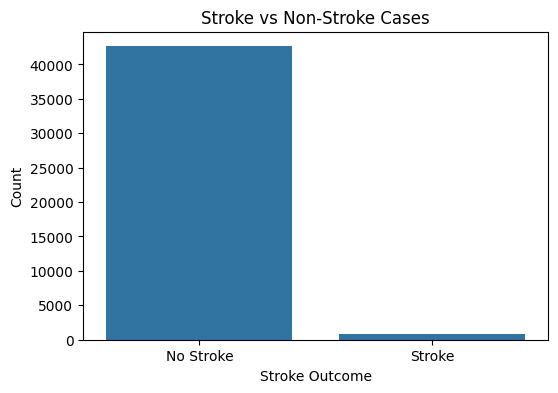

In [28]:
plt.figure(figsize=(6, 4))
sns.countplot(x='stroke', data=dataset)
plt.title("Stroke vs Non-Stroke Cases")
plt.xticks([0, 1], ['No Stroke', 'Stroke'])
plt.xlabel("Stroke Outcome")
plt.ylabel("Count")
plt.show()

## Age vs Stroke

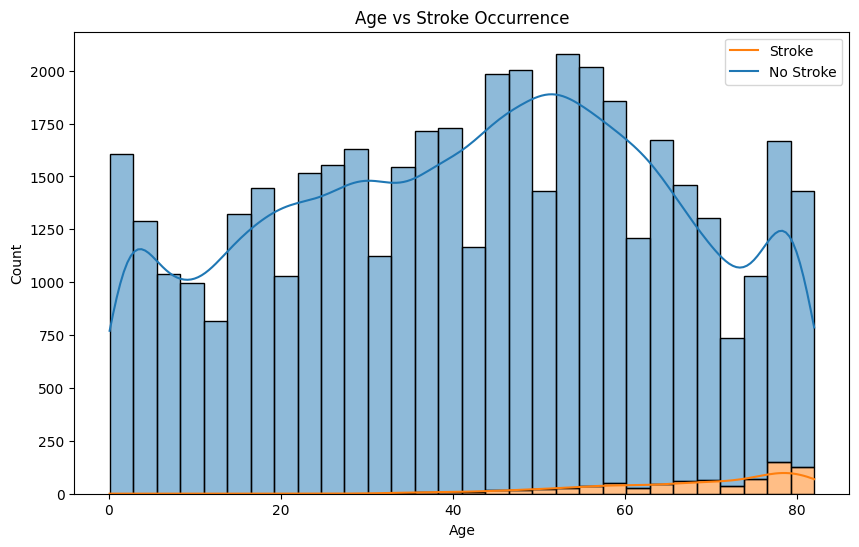

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='age', hue='stroke', multiple="stack", bins=30, kde=True)
plt.title("Age vs Stroke Occurrence")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(labels=["Stroke", "No Stroke"])
plt.show()

## BMI vs Stroke

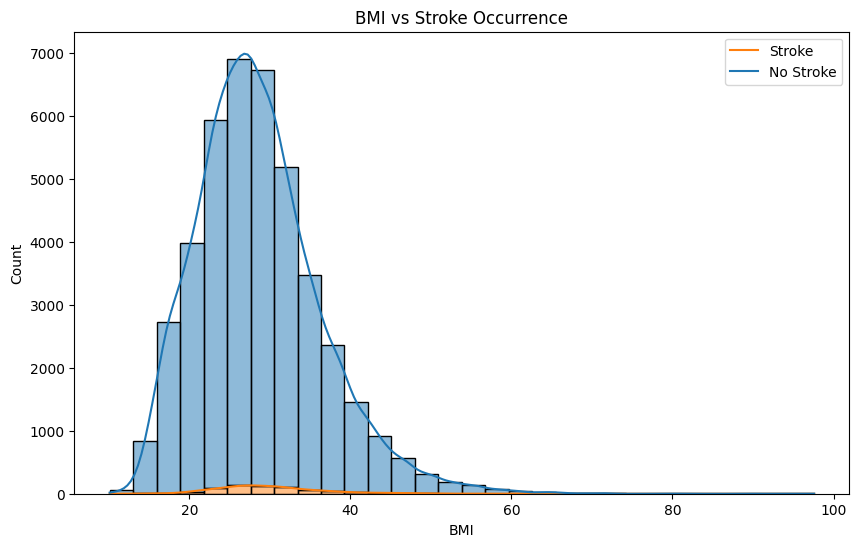

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='bmi', hue='stroke', multiple="stack", bins=30, kde=True)
plt.title("BMI vs Stroke Occurrence")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.legend(labels=["Stroke", "No Stroke"])
plt.show()

## Average Glucose Level vs Stroke

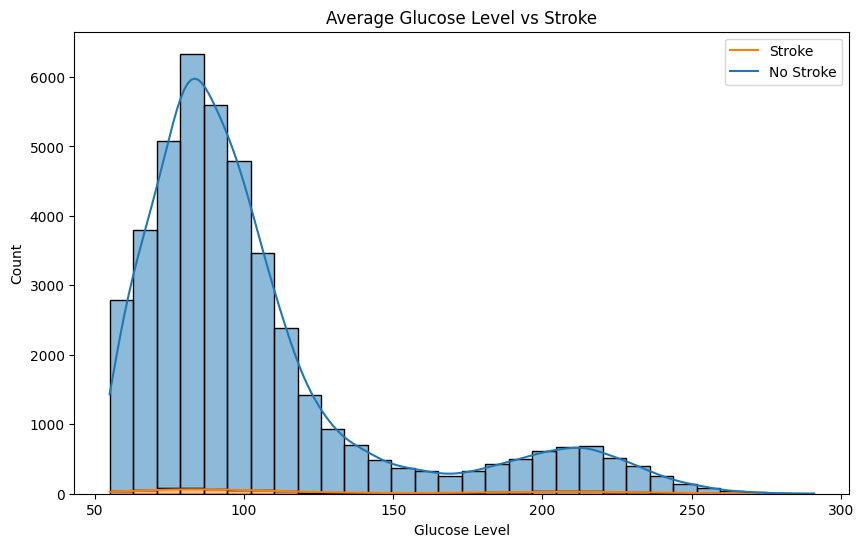

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='avg_glucose_level', hue='stroke', multiple="stack", bins=30, kde=True)
plt.title("Average Glucose Level vs Stroke")
plt.xlabel("Glucose Level")
plt.ylabel("Count")
plt.legend(labels=["Stroke", "No Stroke"])
plt.show()

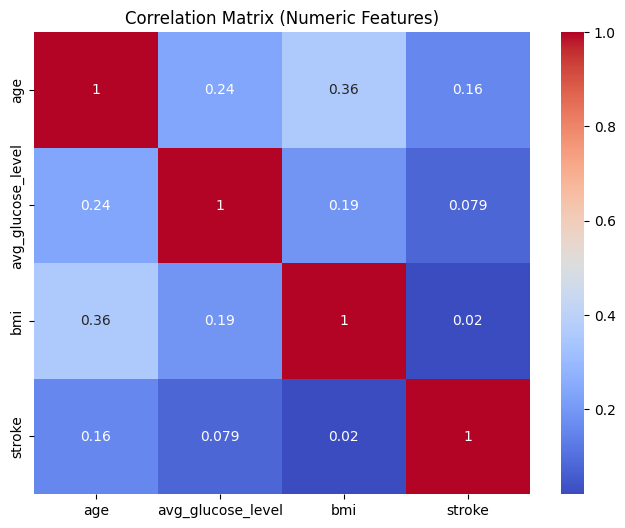

In [32]:
numeric_dataset = dataset[['age', 'avg_glucose_level', 'bmi', 'stroke']]
corr = numeric_dataset.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numeric Features)")
plt.show()

## Work-type distribution

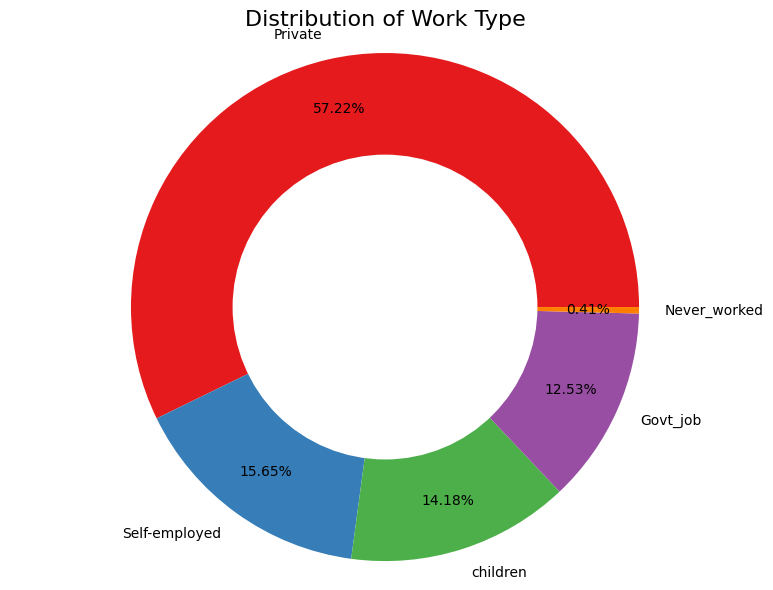

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

work_type_counts = dataset['work_type'].value_counts()

# Plotting the donut chart
plt.figure(figsize=(8, 6))
colors = sns.color_palette("Set1")

# Outer pie (main distribution)
plt.pie(work_type_counts, labels=work_type_counts.index, autopct='%1.2f%%',
        startangle=0, pctdistance=0.8, colors=colors)

# Inner circle for donut effect
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Title and formatting
plt.title('Distribution of Work Type', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

## Data Pre-processing

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (StandardScaler,OrdinalEncoder)
from sklearn.impute import SimpleImputer

dataset = dataset.drop('id', axis=1)

numeric_features = ['age', 'avg_glucose_level', 'bmi']
binary_features = ['hypertension', 'heart_disease', 'ever_married', 'Residence_type']
ordinal_features = ['gender', 'work_type', 'smoking_status']

ordinal_categories = [
    ['Male', 'Female', 'Other'],
    ['children', 'Never_worked', 'Self-employed', 'Private', 'Govt_job'],
    ['never smoked', 'formerly smoked', 'smokes']
]

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

binary_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(categories='auto'))
])

ordinal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(categories=ordinal_categories))
])

# 4) Combine into one ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numeric_features),
    ('bin', binary_pipeline,  binary_features),
    ('ord', ordinal_pipeline, ordinal_features),
])


# Custom Functions (as required)

## Model metrics Function

I have created this model_metrics_function function that will accept y_test, y_pred and y_proba features along with column Names.

It calculates and display the metrics.

This model will be used for all of the implemented models.

In [35]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, log_loss, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

def model_metrics_function(y_test, y_pred, y_proba=None, model_name="Model"):

    # y_test = y_test
    # y_pred = Predicted value against X_test
    # y_proba = probability of predicting 1 (for ROC-AUC)

    # Calculate basic metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)

    # Initialize optional metrics
    logloss = None
    roc_auc = None

    # Only calculate if predicted probabilities are provided
    if y_proba is not None:
        try:
            logloss = log_loss(y_test, y_proba)
            roc_auc = roc_auc_score(y_test, y_proba)
        except ValueError as e:
            print(f"[Warning] Could not compute log loss or ROC-AUC: {e}")

    # Print performance metrics
    print(f"\n{model_name} Performance:")
    print("-" * 100)
    print(f"Accuracy : {accuracy:.4f}")
    print(f"F1 Score : {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")

    if logloss is not None and roc_auc is not None:
        print(f"Log Loss : {logloss:.4f}")
        print(f"ROC-AUC  : {roc_auc:.4f}")
    elif logloss is not None:
        print(f"Log Loss : {logloss:.4f}")
    elif roc_auc is not None:
        print(f"ROC-AUC  : {roc_auc:.4f}")
    else:
        print("ROC-AUC / Log Loss: Not computed (need predicted probabilities)")

    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Stroke', 'Stroke'],
                yticklabels=['No Stroke', 'Stroke'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.tight_layout()
    plt.show()

    # Compute ROC curve and ROC-AUC score
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Optional: Use roc_auc_score for multi-class or binary cases
    roc_auc_score_value = roc_auc_score(y_test, y_proba)

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    sns.set_style("whitegrid")
    plt.plot(fpr, tpr, color='darkorange', lw=2,
            label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


    # Return all metrics (None for logloss and roc_auc if not computed)
    return accuracy, f1, precision, recall, logloss, roc_auc

## MLFlow Log function

In [43]:
! pip install -q pyngrok mlflow

In [46]:
import subprocess
import time

from pyngrok import ngrok

ngrok_auth = "2np54Pr4XIsPCfeXARgjC6SBs08_86515rQWXqu5WSdy6u6ok"

# Set the auth token
ngrok.set_auth_token(ngrok_auth)
# Start MLflow UI server on port 5000 (in background)
mlflow_ui_process = subprocess.Popen(["mlflow", "ui", "--port", "5000"])

time.sleep(5)  # Wait a bit for MLflow UI to start

# Open an ngrok tunnel to the MLflow UI port
public_url = ngrok.connect(5000).public_url
print(f"MLflow UI is live at: {public_url}")

MLflow UI is live at: https://b795-34-48-80-114.ngrok-free.app


I made this function to automate MLFlow logging

In [49]:
import mlflow
import mlflow.sklearn

def log_to_mlflow(experiment_name, run_name, params, metrics, model, model_name, uri=public_url):

    mlflow.set_tracking_uri(uri)
    mlflow.set_experiment(experiment_name)

    with mlflow.start_run(run_name=run_name):
        for key, value in params.items():
            mlflow.log_param(key, value)

        for key, value in metrics.items():
            mlflow.log_metric(key, value)

        mlflow.sklearn.log_model(model, model_name) # (knn_pipeline, "KNN Algorithm")

    print("Model logged to MLflow")


## ML Pipeline

ML Pipeline function that will receive model related data, performs train_test_split, calling model pipeline, model training and testing,

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

def ML_pipeline(classifier, dataset=dataset, preprocessor=preprocessor, target_column='stroke', test_size=0.3, random_state=42, model_name=None):

    # Split fmodel_metrics_functiont
    X = dataset.drop(columns=target_column)
    y = dataset[target_column]

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state
    )

    # Define pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

    # Train the pipeline
    pipeline.fit(X_train, y_train)

    # Model prediction
    y_pred = pipeline.predict(X_test)

    # Predict probabilities for positive class
    y_proba = pipeline.predict_proba(X_test)[:, 1]

    print("Model training and testing process completed")

    # calculating Metrics for the model
    accuracy, f1, precision, recall, logloss, roc_auc = model_metrics_function(
        y_test, y_pred=y_pred, y_proba=y_proba, model_name=model_name
    )

    metrics = {
        "accuracy": accuracy,
        "f1": f1,
        "precision": precision,
        "recall": recall,
        "logloss": logloss,
        "roc_auc": roc_auc
    }


    return pipeline, metrics


# Applying ML Models

## KNN

### N=5

Model training and testing process completed

KNN Model with N=5 (and 'minkowski' metrics) Performance:
----------------------------------------------------------------------------------------------------
Accuracy : 0.9814
F1 Score : 0.0000
Precision: 0.0000
Recall   : 0.0000
Log Loss : 0.5345
ROC-AUC  : 0.5709


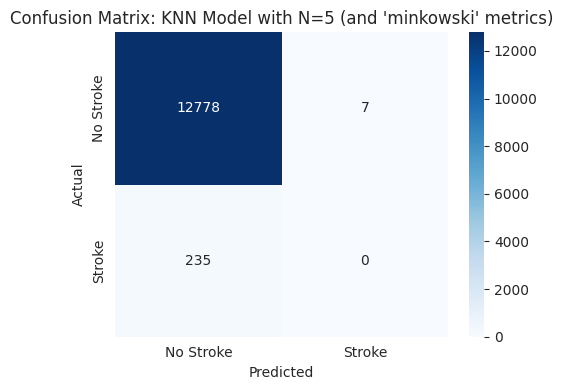

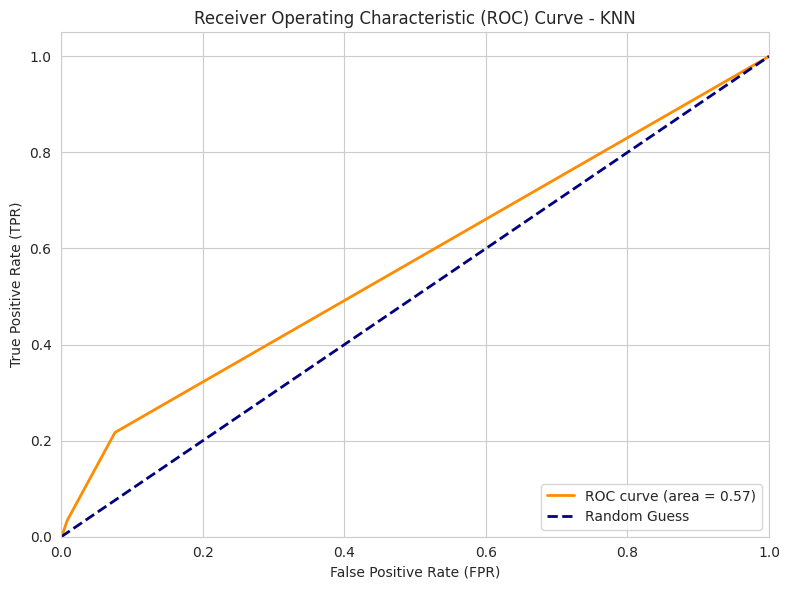

2025/06/02 10:08:28 INFO mlflow.tracking.fluent: Experiment with name 'Without_SMOTE' does not exist. Creating a new experiment.
2025/06/02 10:08:29 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2025/06/02 10:08:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run KNN_Run_N_5 at: https://b795-34-48-80-114.ngrok-free.app/#/experiments/467199476006030070/runs/e1e754be2b284a669e99f087047e26af
🧪 View experiment at: https://b795-34-48-80-114.ngrok-free.app/#/experiments/467199476006030070
Model logged to MLflow


In [61]:
classifier = KNeighborsClassifier(n_neighbors=5)
model_name="KNN Model with N=5 (and 'minkowski' metrics)"

# Calling ML_pipeline function to train and test KNN Model wih the given parameters
pipeline, metrics = ML_pipeline(classifier, model_name=model_name)

params = {
    "model": "KNN",
    "n_neighbors": 5,
    "metric": "euclidean"
}

experiment_name="Without_SMOTE"
run_name="KNN_Run_N_5"
model=pipeline,

# logging results to MLFlow
log_to_mlflow(experiment_name, run_name, params, metrics, model="kNN", model_name=model_name)




### paper implementation (N=173)

Model training and testing process completed

KNN Paper Model Implementation Performance:
----------------------------------------------------------------------------------------------------
Accuracy : 0.9820
F1 Score : 0.0000
Precision: 0.0000
Recall   : 0.0000
Log Loss : 0.0958
ROC-AUC  : 0.8139


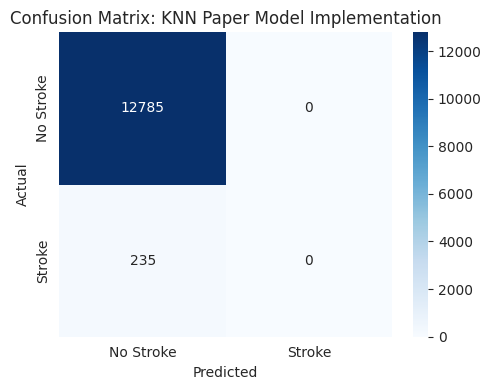

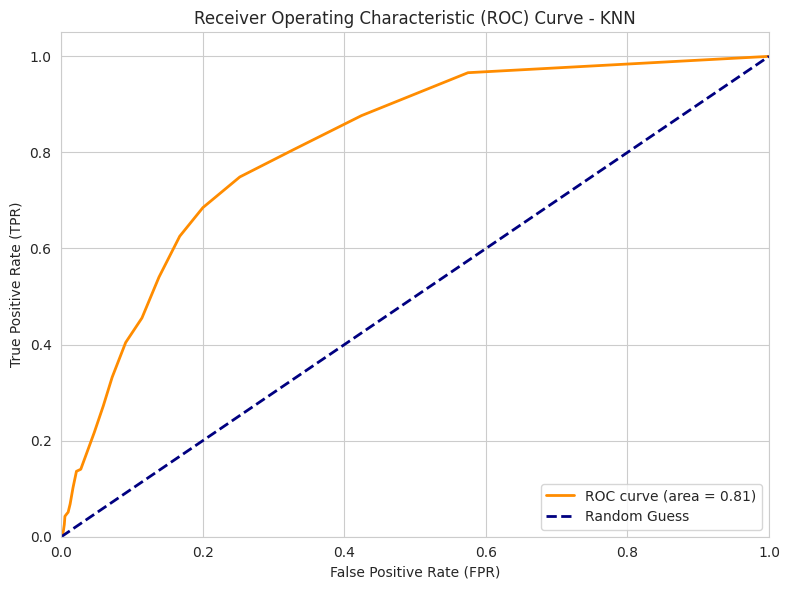

2025/06/02 10:08:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run KNN_Paper_Implementation at: https://b795-34-48-80-114.ngrok-free.app/#/experiments/467199476006030070/runs/b1177f6715304ebfadc334acc85cd9aa
🧪 View experiment at: https://b795-34-48-80-114.ngrok-free.app/#/experiments/467199476006030070
Model logged to MLflow


In [62]:
classifier = KNeighborsClassifier(n_neighbors=173, metric='euclidean')
model_name = "KNN Paper Model Implementation"

pipeline, metrics = ML_pipeline(classifier, model_name=model_name)

params = {
    "model": "KNN",
    "n_neighbors": 173,
    "metric": "euclidean"
}

experiment_name="Without_SMOTE"
run_name = "KNN_Paper_Implementation"

# Log to MLflow
log_to_mlflow(
    experiment_name=experiment_name,
    run_name=run_name,
    params=params,
    metrics=metrics,
    model=pipeline,
    model_name=model_name
)


### KNN with Cross-fold validation

In [63]:
from sklearn.model_selection import StratifiedKFold, cross_validate

def cross_validate_pipeline(classifier, X, y, model_name, n_splits=5):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    scoring = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc', 'neg_log_loss']

    cv_scores = cross_validate(pipeline, X, y, cv=cv, scoring=scoring)
    summary = {}

    print(f"\n📊 Cross-Validation Results for {model_name}:")
    for metric in scoring:
        scores = cv_scores[f'test_{metric}']
        mean_score = scores.mean()
        std_score = scores.std()

        if metric == 'neg_log_loss':
            mean_score = -mean_score
            metric_key = 'log_loss'
        else:
            metric_key = metric

        print(f"{metric_key.replace('_', ' ').title()} - Mean: {mean_score:.4f}, Std: {std_score:.4f}")
        summary[f"{metric_key}"] = mean_score
        summary[f"{metric_key}"] = std_score

    return summary


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p


📊 Cross-Validation Results for KNN Paper Model:
Accuracy - Mean: 0.9820, Std: 0.0001
F1 - Mean: 0.0000, Std: 0.0000
Precision - Mean: 0.0000, Std: 0.0000
Recall - Mean: 0.0000, Std: 0.0000
Roc Auc - Mean: 0.8314, Std: 0.0101
Log Loss - Mean: 0.0914, Std: 0.0071
Model training and testing process completed

KNN Paper Model Performance:
----------------------------------------------------------------------------------------------------
Accuracy : 0.9820
F1 Score : 0.0000
Precision: 0.0000
Recall   : 0.0000
Log Loss : 0.0958
ROC-AUC  : 0.8139


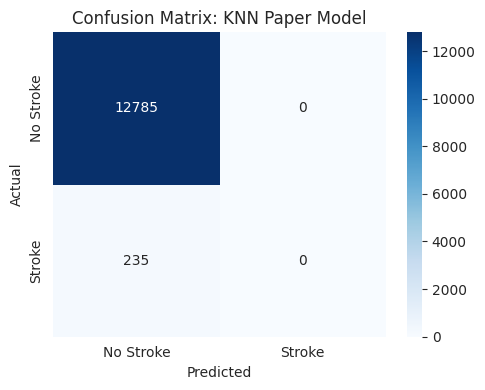

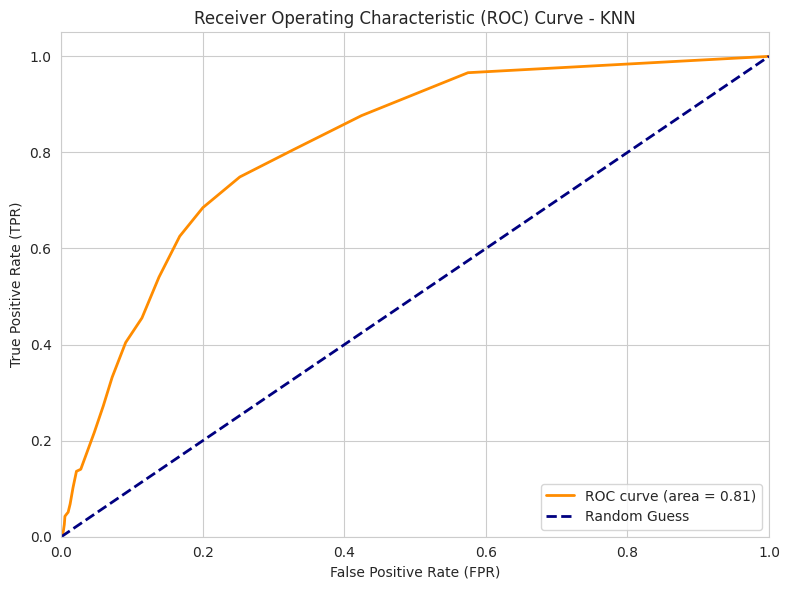

2025/06/02 10:09:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run KNN_CV_and_Test at: https://b795-34-48-80-114.ngrok-free.app/#/experiments/467199476006030070/runs/a556ac2a05c043e39b37e69cc92b5bfd
🧪 View experiment at: https://b795-34-48-80-114.ngrok-free.app/#/experiments/467199476006030070
Model logged to MLflow


In [64]:
# Config
classifier = KNeighborsClassifier(n_neighbors=173, metric='euclidean')
model_name = "KNN Paper Model"

# Full Dataset for CV
X = dataset.drop('stroke', axis=1)
y = dataset['stroke']

# Run cross-validation
cv_metrics = cross_validate_pipeline(classifier, X, y, model_name=model_name)

# Run ML pipeline (train/test split, metrics, and fitted pipeline)
pipeline, test_metrics = ML_pipeline(classifier, model_name=model_name)

# Combine metrics
all_metrics = {**cv_metrics, **test_metrics}

# Parameters for logging
params = {
    "model": "KNN",
    "n_neighbors": 173,
    "metric": "euclidean"
}

# MLflow Logging
experiment_name="Without_SMOTE"
run_name = "KNN_CV_and_Test"

log_to_mlflow(
    experiment_name=experiment_name,
    run_name=run_name,
    params=params,
    metrics=all_metrics,
    model=pipeline,
    model_name=model_name
)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p


📊 Cross-Validation Results for KNN Paper Model:
Accuracy - Mean: 0.9820, Std: 0.0001
F1 - Mean: 0.0000, Std: 0.0000
Precision - Mean: 0.0000, Std: 0.0000
Recall - Mean: 0.0000, Std: 0.0000
Roc Auc - Mean: 0.8314, Std: 0.0101
Log Loss - Mean: 0.0914, Std: 0.0071
Model training and testing process completed

KNN Paper Model Performance:
----------------------------------------------------------------------------------------------------
Accuracy : 0.9820
F1 Score : 0.0000
Precision: 0.0000
Recall   : 0.0000
Log Loss : 0.0958
ROC-AUC  : 0.8139


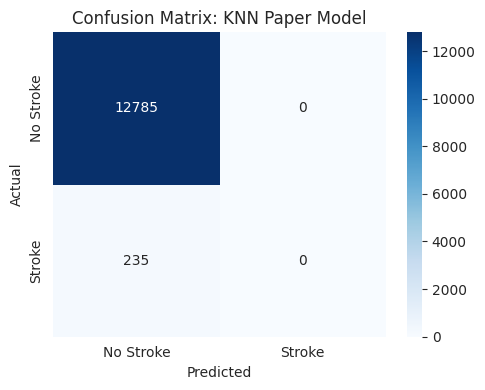

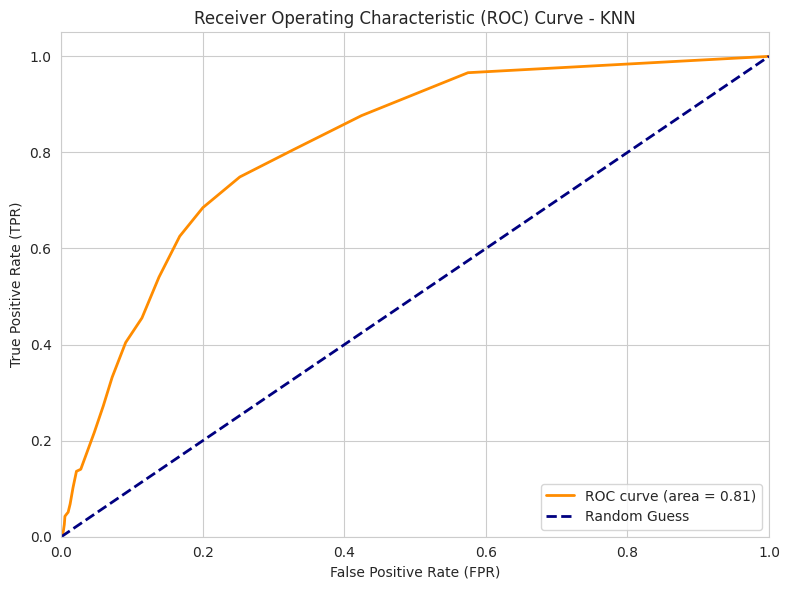

2025/06/02 10:10:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run KNN_CV_and_Test at: https://b795-34-48-80-114.ngrok-free.app/#/experiments/467199476006030070/runs/c883a2cc5b2b4c7c81bf835a491ab36e
🧪 View experiment at: https://b795-34-48-80-114.ngrok-free.app/#/experiments/467199476006030070
Model logged to MLflow


In [65]:
# Config
classifier = KNeighborsClassifier(n_neighbors=173, metric='euclidean')
model_name = "KNN Paper Model"

# Full Dataset for CV
X = dataset.drop('stroke', axis=1)
y = dataset['stroke']

# Run cross-validation
cv_metrics = cross_validate_pipeline(classifier, X, y, model_name=model_name)

# Run ML pipeline (train/test split, metrics, and fitted pipeline)
pipeline, test_metrics = ML_pipeline(classifier, model_name=model_name)

# Combine metrics
all_metrics = {**cv_metrics, **test_metrics}

# Parameters for logging
params = {
    "model": "KNN",
    "n_neighbors": 11,
    "metric": "euclidean"
}

# MLflow Logging
experiment_name="Without_SMOTE"
run_name = "KNN_CV_and_Test"

log_to_mlflow(
    experiment_name=experiment_name,
    run_name=run_name,
    params=params,
    metrics=all_metrics,
    model=pipeline,
    model_name=model_name
)


## Logistic Regression

Model training and testing process completed

Logistic Regression Model Performance:
----------------------------------------------------------------------------------------------------
Accuracy : 0.7455
F1 Score : 0.1029
Precision: 0.0549
Recall   : 0.8085
Log Loss : 0.4865
ROC-AUC  : 0.8481


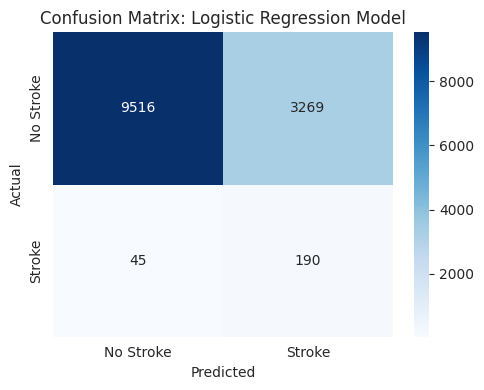

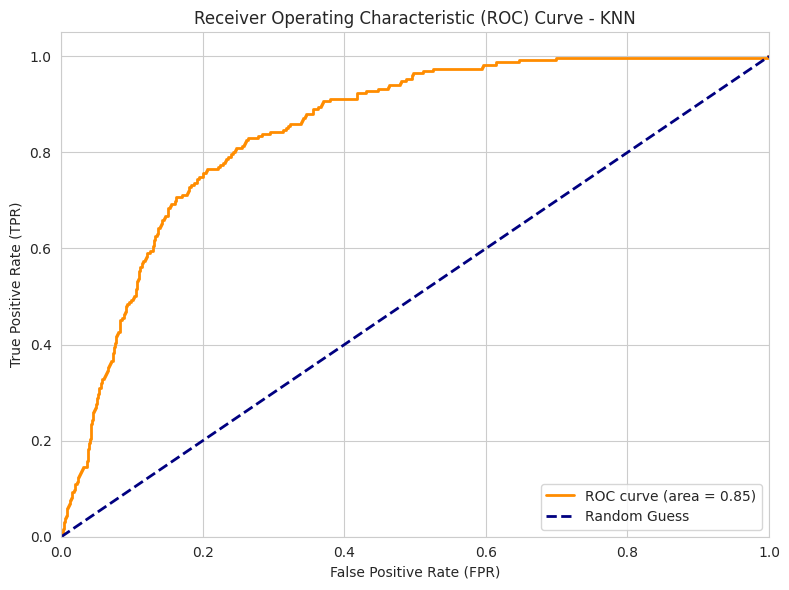

2025/06/02 10:10:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LogReg_Run_1 at: https://b795-34-48-80-114.ngrok-free.app/#/experiments/467199476006030070/runs/3c2ede482f124cf1b967fadf27d22378
🧪 View experiment at: https://b795-34-48-80-114.ngrok-free.app/#/experiments/467199476006030070
Model logged to MLflow


In [66]:
from sklearn.linear_model import LogisticRegression

# Define the classifier
classifier = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

# Give a clear name for logging
model_name = "Logistic Regression Model"

# Train and evaluate the model using the reusable ML_pipeline function
pipeline, metrics = ML_pipeline(classifier, model_name=model_name)

# Parameters for logging
params = {
    "model": "Logistic Regression",
    "max_iter": 1000,
    "class_weight": "balanced",
    "random_state": 42
}

# MLflow experiment metadata
experiment_name="Without_SMOTE"
run_name = "LogReg_Run_1"

# Log everything to MLflow
log_to_mlflow(
    experiment_name=experiment_name,
    run_name=run_name,
    params=params,
    metrics=metrics,
    model=pipeline,
    model_name=model_name
)


## RandomForestClassifier

Model training and testing process completed

Random Forest Classifier Model Performance:
----------------------------------------------------------------------------------------------------
Accuracy : 0.9816
F1 Score : 0.0000
Precision: 0.0000
Recall   : 0.0000
Log Loss : 0.1888
ROC-AUC  : 0.7580


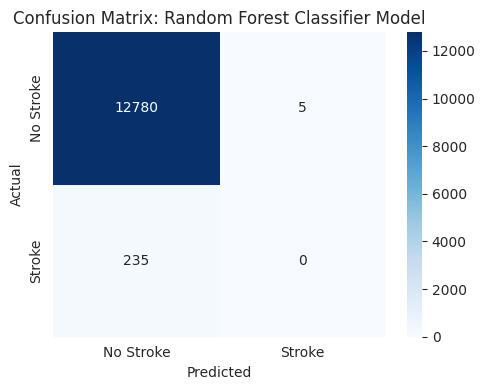

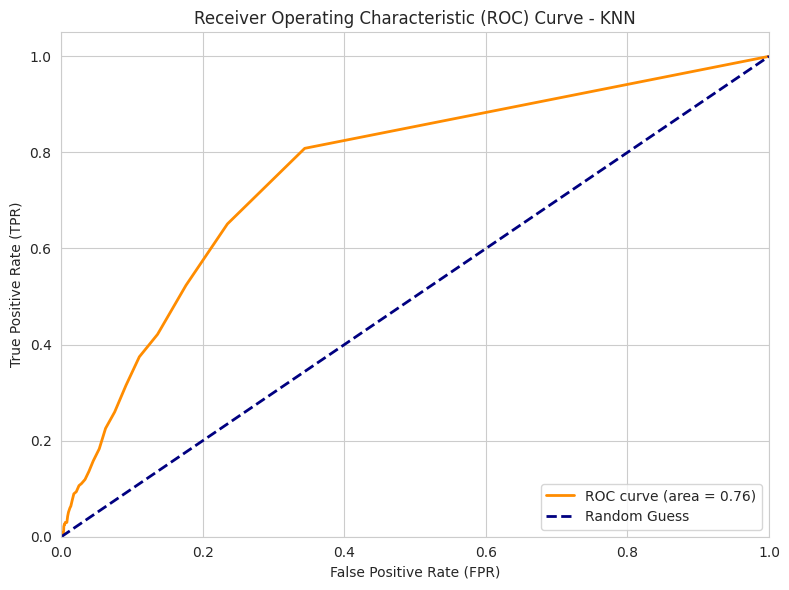

2025/06/02 10:11:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForest_Run_1 at: https://b795-34-48-80-114.ngrok-free.app/#/experiments/467199476006030070/runs/683a5a5cc2a948658277b3f675a49905
🧪 View experiment at: https://b795-34-48-80-114.ngrok-free.app/#/experiments/467199476006030070
Model logged to MLflow


In [68]:
from sklearn.ensemble import RandomForestClassifier

# Define the classifier
classifier = RandomForestClassifier(n_estimators=100,class_weight='balanced',random_state=42)

# Define model name for logging and tracking
model_name = "Random Forest Classifier Model"

# Train and evaluate using your reusable pipeline function
pipeline, metrics = ML_pipeline(classifier, model_name=model_name)

# Define the model parameters for logging
params = {
    "model": "Random Forest",
    "n_estimators": 100,
    "class_weight": "balanced",
    "random_state": 42
}

# Define MLflow experiment and run names
experiment_name="Without_SMOTE"
run_name = "RandomForest_Run_1"

# Log the model, metrics, and parameters to MLflow
log_to_mlflow(experiment_name=experiment_name,run_name=run_name,params=params,metrics=metrics,model=pipeline,model_name=model_name)


## Support Vector Classifier

### SVC Linear

Model training and testing process completed

SVM Model with Linear Kernel Performance:
----------------------------------------------------------------------------------------------------
Accuracy : 0.7370
F1 Score : 0.1018
Precision: 0.0542
Recall   : 0.8255
Log Loss : 0.0752
ROC-AUC  : 0.8490


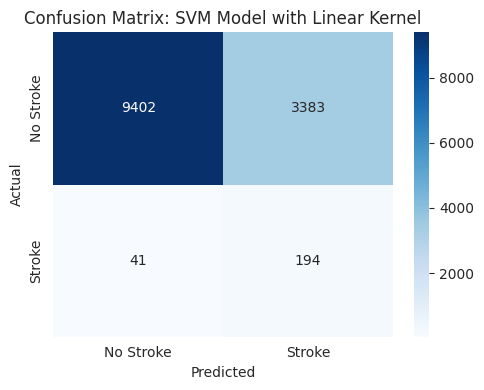

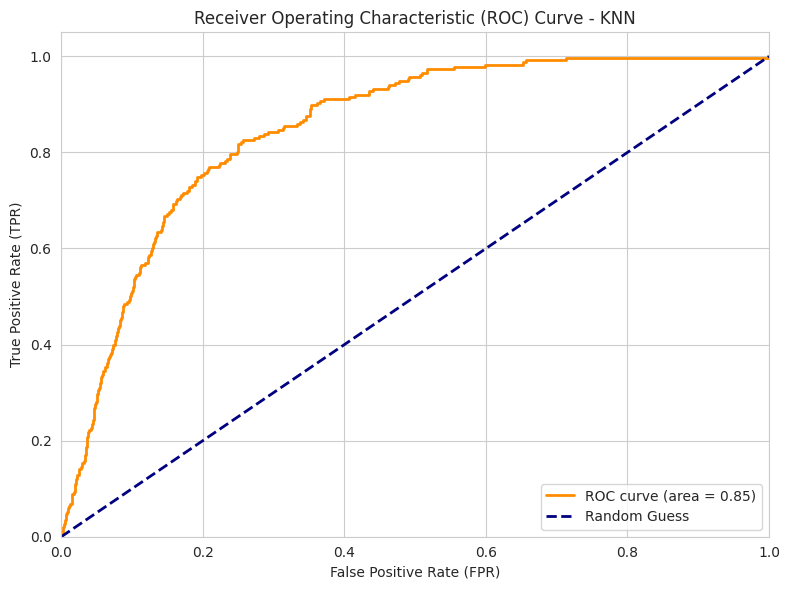

2025/06/02 10:14:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run SVM_Linear_Run_1 at: https://b795-34-48-80-114.ngrok-free.app/#/experiments/467199476006030070/runs/90d47498859a49eb9d66e1932c73fba2
🧪 View experiment at: https://b795-34-48-80-114.ngrok-free.app/#/experiments/467199476006030070
Model logged to MLflow


In [69]:
from sklearn.svm import SVC

# Define the classifier and model name
classifier = SVC(kernel='linear', probability=True, class_weight='balanced', random_state=42)
model_name = "SVM Model with Linear Kernel"

# Train and evaluate using your ML_pipeline function
pipeline, metrics = ML_pipeline(classifier, model_name=model_name)

# Define parameters to log
params = {
    "model": "SVM",
    "kernel": "linear",
    "class_weight": "balanced",
    "probability": True
}

# Define experiment and run details
experiment_name="Without_SMOTE"
run_name = "SVM_Linear_Run_1"

# Log to MLflow
log_to_mlflow(experiment_name, run_name, params, metrics, model=pipeline, model_name=model_name)


### SVC RBF

Model training and testing process completed

SVM Model with RBF Kernel Performance:
----------------------------------------------------------------------------------------------------
Accuracy : 0.7493
F1 Score : 0.1008
Precision: 0.0539
Recall   : 0.7787
Log Loss : 0.0773
ROC-AUC  : 0.8235


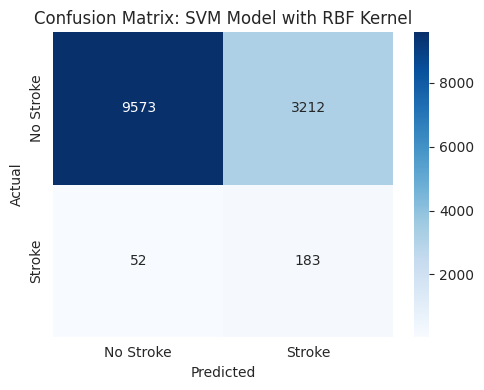

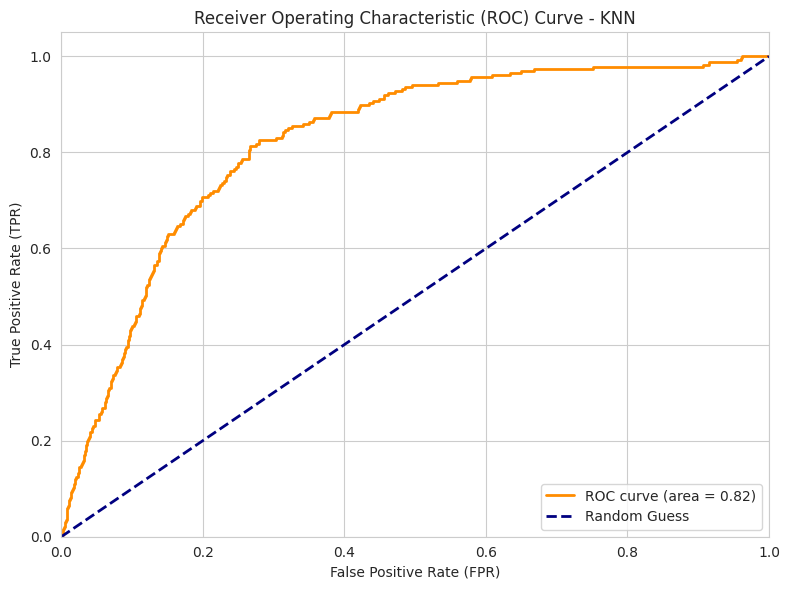

2025/06/02 10:18:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run SVM_RBF_Run_1 at: https://b795-34-48-80-114.ngrok-free.app/#/experiments/467199476006030070/runs/12f3f748dde04efe8e7a9917833ee8ee
🧪 View experiment at: https://b795-34-48-80-114.ngrok-free.app/#/experiments/467199476006030070
Model logged to MLflow


In [70]:
from sklearn.svm import SVC

# Define the classifier and model name
classifier = SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)
model_name = "SVM Model with RBF Kernel"

# Train and evaluate using your ML_pipeline function
pipeline, metrics = ML_pipeline(classifier, model_name=model_name)

# Define parameters to log
params = {
    "model": "SVM",
    "kernel": "rbf",
    "class_weight": "balanced",
    "probability": True
}

# Define experiment and run details
experiment_name="Without_SMOTE"
run_name = "SVM_RBF_Run_1"

# Log to MLflow
log_to_mlflow(experiment_name, run_name, params, metrics, model=pipeline, model_name=model_name)


### SVC Polynomial Kernel

Model training and testing process completed

SVM Model with Polynomial Kernel (degree=3) Performance:
----------------------------------------------------------------------------------------------------
Accuracy : 0.7459
F1 Score : 0.0996
Precision: 0.0532
Recall   : 0.7787
Log Loss : 0.0781
ROC-AUC  : 0.8200


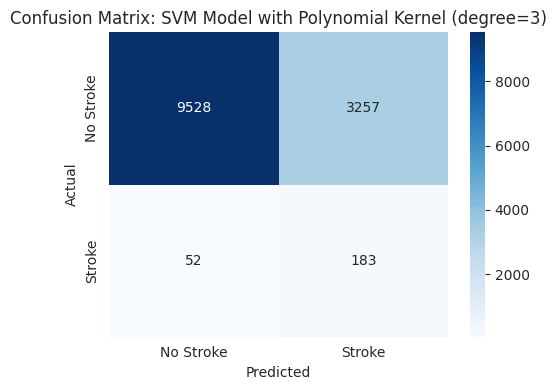

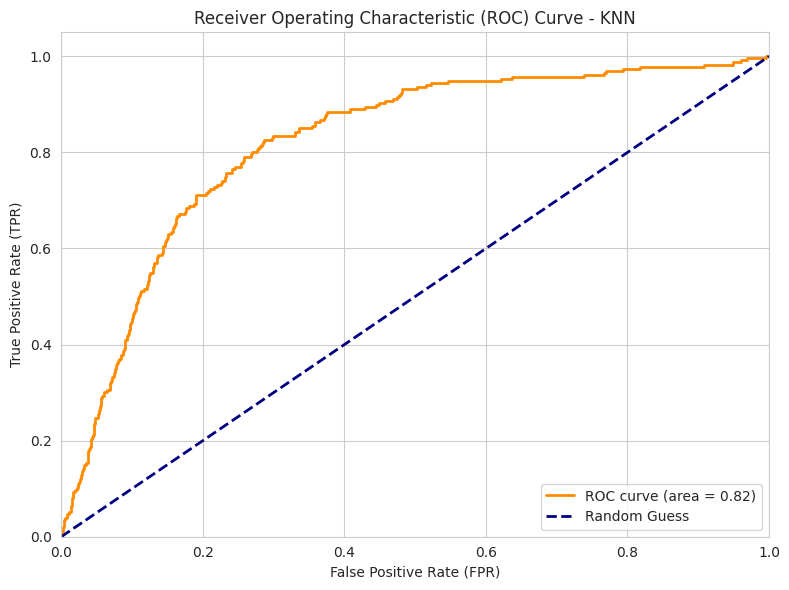

2025/06/02 10:21:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run SVM_Poly_Run_Degree_3 at: https://b795-34-48-80-114.ngrok-free.app/#/experiments/467199476006030070/runs/7b98d7db1c68446a8f03e68907aedeb0
🧪 View experiment at: https://b795-34-48-80-114.ngrok-free.app/#/experiments/467199476006030070
Model logged to MLflow


In [71]:
from sklearn.svm import SVC

# Define the classifier and model name
classifier = SVC(kernel='poly', degree=3, probability=True, class_weight='balanced', random_state=42)
model_name = "SVM Model with Polynomial Kernel (degree=3)"

# Train and evaluate using ML_pipeline function
pipeline, metrics = ML_pipeline(classifier, model_name=model_name)

# Define parameters to log
params = {
    "model": "SVM",
    "kernel": "poly",
    "degree": 3,
    "class_weight": "balanced",
    "probability": True
}

# Define experiment and run details
experiment_name="Without_SMOTE"
run_name = "SVM_Poly_Run_Degree_3"

# Log to MLflow
log_to_mlflow(experiment_name, run_name, params, metrics, model=pipeline, model_name=model_name)


### SVC Sigmoid Kernel

Model training and testing process completed

SVM Model with Sigmoid Kernel Performance:
----------------------------------------------------------------------------------------------------
Accuracy : 0.6909
F1 Score : 0.0779
Precision: 0.0412
Recall   : 0.7234
Log Loss : 0.0853
ROC-AUC  : 0.7563


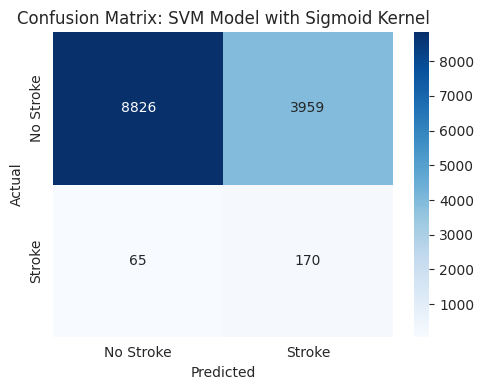

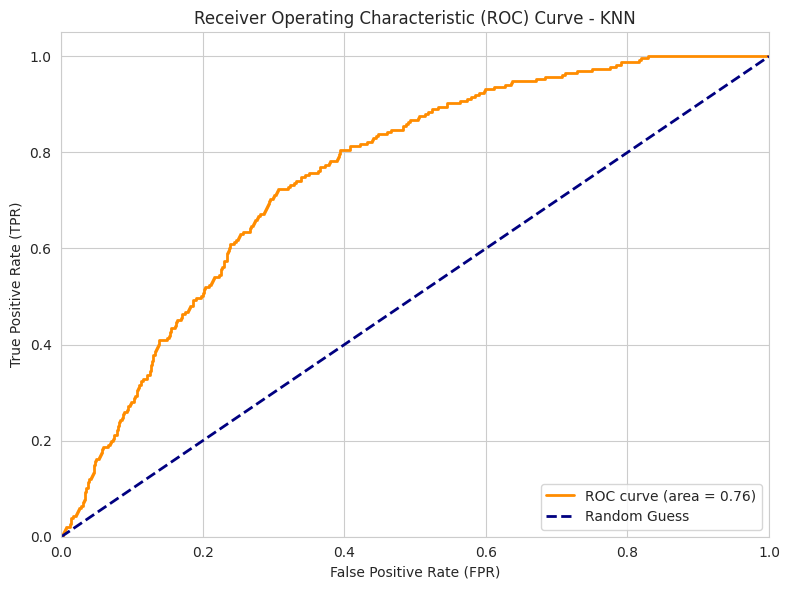

2025/06/02 10:24:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run SVM_Sigmoid_Run at: https://b795-34-48-80-114.ngrok-free.app/#/experiments/467199476006030070/runs/9bc4b0fccc6447349c16409bd4e3b423
🧪 View experiment at: https://b795-34-48-80-114.ngrok-free.app/#/experiments/467199476006030070
Model logged to MLflow


In [72]:
from sklearn.svm import SVC

# Define the classifier and model name
classifier = SVC(kernel='sigmoid', probability=True, class_weight='balanced', random_state=42)
model_name = "SVM Model with Sigmoid Kernel"

# Train and evaluate using ML_pipeline function
pipeline, metrics = ML_pipeline(classifier, model_name=model_name)

# Define parameters to log
params = {
    "model": "SVM",
    "kernel": "sigmoid",
    "class_weight": "balanced",
    "probability": True
}

# Define experiment and run details
experiment_name="Without_SMOTE"
run_name = "SVM_Sigmoid_Run"

# Log to MLflow
log_to_mlflow(experiment_name, run_name, params, metrics, model=pipeline, model_name=model_name)


## DecisionTreeClassifier

Model training and testing process completed

Decision Tree Classifier Performance:
----------------------------------------------------------------------------------------------------
Accuracy : 0.9667
F1 Score : 0.0687
Precision: 0.0693
Recall   : 0.0681
Log Loss : 1.2015
ROC-AUC  : 0.5256


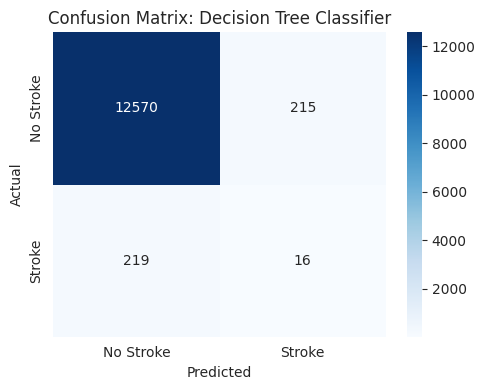

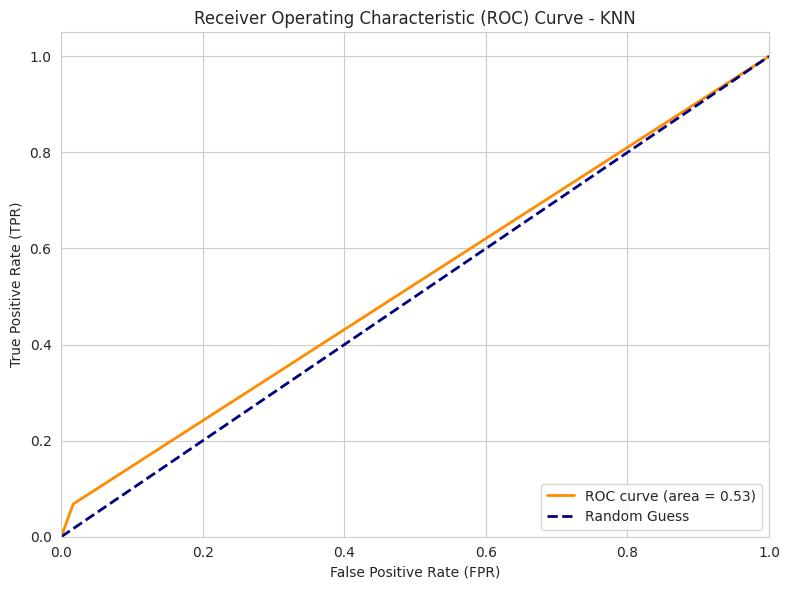

2025/06/02 10:25:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run DT_Run_1 at: https://b795-34-48-80-114.ngrok-free.app/#/experiments/467199476006030070/runs/88b2522ec7d5409d9d39eafb274309f4
🧪 View experiment at: https://b795-34-48-80-114.ngrok-free.app/#/experiments/467199476006030070
Model logged to MLflow


In [73]:
from sklearn.tree import DecisionTreeClassifier

# Define the classifier and model name
classifier = DecisionTreeClassifier(class_weight='balanced', random_state=42)
model_name = "Decision Tree Classifier"

# Train and evaluate using your ML_pipeline function
pipeline, metrics = ML_pipeline(classifier, model_name=model_name)

# Define parameters to log
params = {
    "model": "Decision Tree",
    "class_weight": "balanced",
    "random_state": 42
}

# Define experiment and run names
experiment_name="Without_SMOTE"
run_name = "DT_Run_1"

# Log results to MLflow
log_to_mlflow(experiment_name, run_name, params, metrics, model=pipeline, model_name=model_name)


## Naive Byes

Model training and testing process completed

Naive Bayes Classifier Performance:
----------------------------------------------------------------------------------------------------
Accuracy : 0.9073
F1 Score : 0.1053
Precision: 0.0637
Recall   : 0.3021
Log Loss : 0.4474
ROC-AUC  : 0.8115


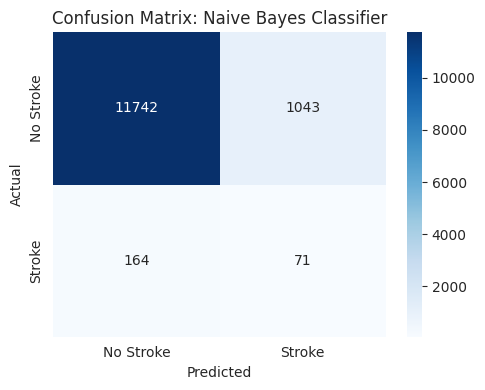

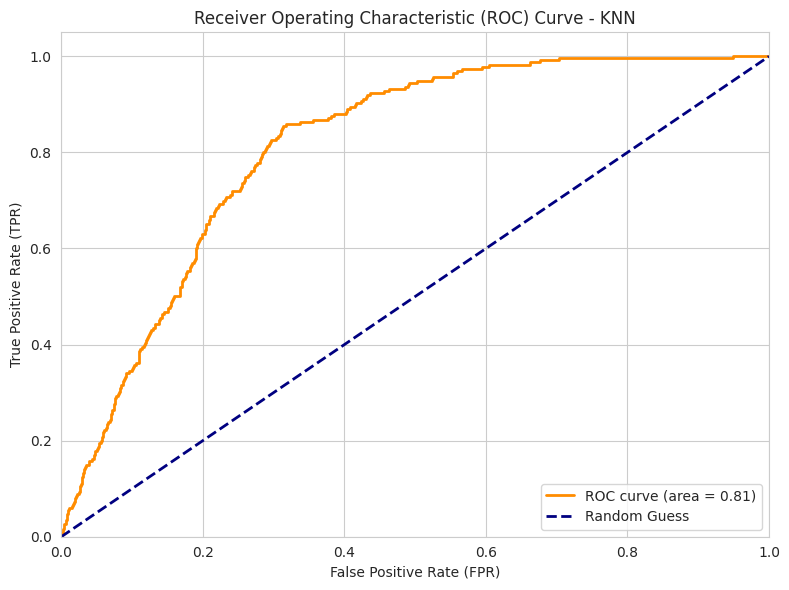

2025/06/02 10:25:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run NB_Run_1 at: https://b795-34-48-80-114.ngrok-free.app/#/experiments/467199476006030070/runs/a4447f7ad0254b468a32312970ac4353
🧪 View experiment at: https://b795-34-48-80-114.ngrok-free.app/#/experiments/467199476006030070
Model logged to MLflow


In [74]:
from sklearn.naive_bayes import GaussianNB

# Define the classifier and model name
classifier = GaussianNB()
model_name = "Naive Bayes Classifier"

# Train and evaluate using your ML_pipeline function
pipeline, metrics = ML_pipeline(classifier, model_name=model_name)

# Define parameters to log
params = {
    "model": "GaussianNB"
}

# Define experiment and run names
experiment_name="Without_SMOTE"
run_name = "NB_Run_1"

# Log results to MLflow
log_to_mlflow(experiment_name, run_name, params, metrics, model=pipeline, model_name=model_name)


## XGBClassifier

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:25:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model training and testing process completed

XGBoost Classifier Performance:
----------------------------------------------------------------------------------------------------
Accuracy : 0.9738
F1 Score : 0.0858
Precision: 0.1159
Recall   : 0.0681
Log Loss : 0.1011
ROC-AUC  : 0.7986


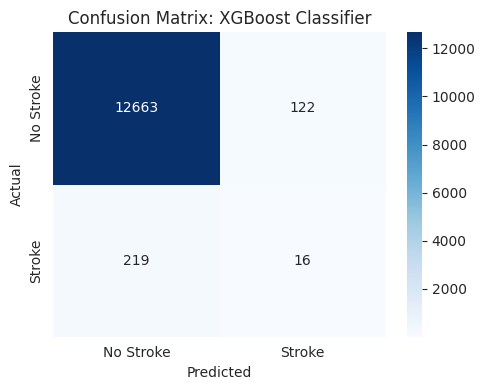

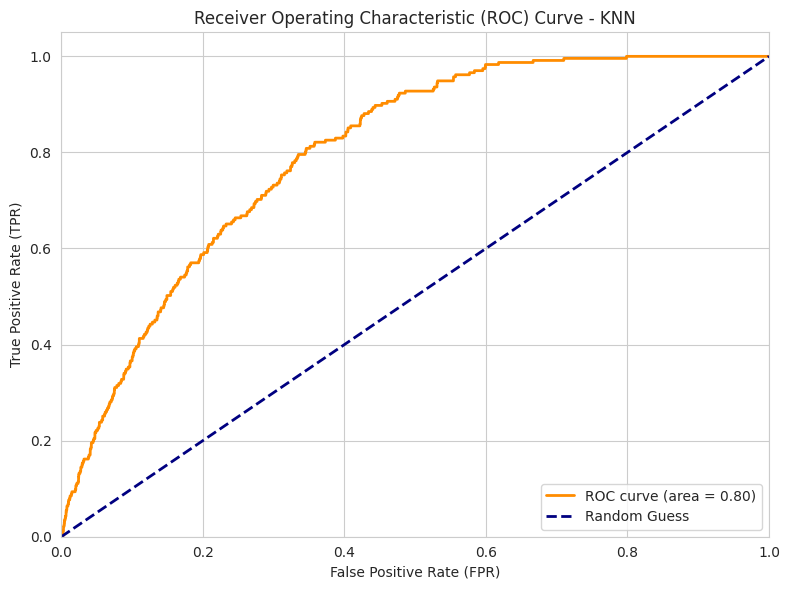

2025/06/02 10:25:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run XGB_Run_1 at: https://b795-34-48-80-114.ngrok-free.app/#/experiments/467199476006030070/runs/7707544b577444cdb95c12f3010972e6
🧪 View experiment at: https://b795-34-48-80-114.ngrok-free.app/#/experiments/467199476006030070
Model logged to MLflow


In [75]:
from xgboost import XGBClassifier

# Define the classifier and model name
classifier = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=5,
    random_state=42
)
model_name = "XGBoost Classifier"

# Train and evaluate using your ML_pipeline function
pipeline, metrics = ML_pipeline(classifier, model_name=model_name)

# Define parameters to log
params = {
    "model": "XGBoost",
    "eval_metric": "logloss",
    "scale_pos_weight": 5
}

# Define experiment and run names
experiment_name="Without_SMOTE"
run_name = "XGB_Run_1"

# Log results to MLflow
log_to_mlflow(experiment_name, run_name, params, metrics, model=pipeline, model_name=model_name)
